In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [46]:
df_10_10inst = pd.read_csv('C:/PSL_KNN/data_10_frames_10_instances.csv')

df_10_10inst['classes'] = df_10_10inst['videoname'].apply(lambda x: x.split('_')[0])
x_10_10inst = df_10_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_10_10inst['videoname']))

['aprender_175' 'aprender_18' 'aprender_195' 'aprender_217' 'aprender_27'
 'aprender_282' 'aprender_34' 'aprender_35' 'aprender_7' 'aprender__466'
 'bien_174' 'bien_230' 'bien_241' 'bien_288' 'bien_295' 'bien_337'
 'bien_39' 'bien_416' 'bien_561' 'bien_626' 'comer_144' 'comer_164'
 'comer_248' 'comer_313' 'comer_412' 'comer_422' 'comer_475' 'comer_625'
 'comer_712' 'comer_747' 'cuánto_405' 'cuánto_420' 'cuánto_445'
 'cuánto_448' 'cuánto_456' 'cuánto_460' 'cuánto_468' 'cuánto_483'
 'cuánto_703' 'cuánto_742' 'cómo_12' 'cómo_171' 'cómo_223' 'cómo_230'
 'cómo_379' 'cómo_427' 'cómo_44' 'cómo_85' 'cómo_9' 'cómo_90' 'dentro_241'
 'dentro_369' 'dentro_457' 'dentro_532' 'dentro_55' 'dentro_627'
 'dentro_647' 'dentro_664' 'dentro_692' 'dentro_73' 'emoción_143'
 'emoción_145' 'emoción_188' 'emoción_249' 'emoción_250' 'emoción_286'
 'emoción_43' 'emoción_54' 'emoción_71' 'emoción_93' 'fuerte_153'
 'fuerte_310' 'fuerte_314' 'fuerte_361' 'fuerte_362' 'fuerte_363'
 'fuerte_372' 'fuerte_459' 'fuerte_5

In [47]:
temp_10_10inst = pd.DataFrame(x_10_10inst['coordinate'].tolist())
temp_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,450,451,452,453,454,455,456,457,458,459
0,0.495806,0.523832,0.543781,0.561008,0.480482,0.470032,0.456728,0.594658,0.453686,0.529510,...,0.500838,0.711247,0.265011,0.616345,0.206288,0.619600,0.193010,0.575766,0.216091,0.569957
1,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,0.548546,...,0.835745,0.593835,0.717371,0.273257,0.725650,0.203608,0.691391,0.187500,0.682232,0.215004
2,0.497058,0.520504,0.534275,0.545982,0.475575,0.459812,0.444983,0.569902,0.425907,0.531288,...,0.545798,0.660586,0.365322,0.592418,0.316429,0.612745,0.295847,0.586953,0.318972,0.577937
3,0.534864,0.561178,0.575552,0.589922,0.518197,0.505109,0.491974,0.622407,0.479705,0.565821,...,0.656457,0.623457,0.452110,0.448878,0.396107,0.399155,0.361584,0.365836,0.379465,0.378608
4,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,0.533213,...,0.823187,0.585232,0.670107,0.265102,0.663198,0.206352,0.617142,0.187647,0.620610,0.215813


In [48]:
temp_10_10inst.insert(0,"instance",['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27'
,'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466'
,'bien_174','bien_230','bien_241','bien_288','bien_295','bien_337'
,'bien_39','bien_416','bien_561','bien_626','comer_144','comer_164'
,'comer_248','comer_313','comer_412','comer_422','comer_475','comer_625'
,'comer_712','comer_747','cuánto_405','cuánto_420','cuánto_445'
,'cuánto_448','cuánto_456','cuánto_460','cuánto_468','cuánto_483'
,'cuánto_703','cuánto_742','cómo_12','cómo_171','cómo_223','cómo_230'
,'cómo_379','cómo_427','cómo_44','cómo_85','cómo_9','cómo_90','dentro_241'
,'dentro_369','dentro_457','dentro_532','dentro_55','dentro_627'
,'dentro_647','dentro_664','dentro_692','dentro_73','emoción_143'
,'emoción_145','emoción_188','emoción_249','emoción_250','emoción_286'
,'emoción_43','emoción_54','emoción_71','emoción_93','fuerte_153'
,'fuerte_310','fuerte_314','fuerte_361','fuerte_362','fuerte_363'
,'fuerte_372','fuerte_459','fuerte_571','fuerte_588','pensar_235'
,'pensar_450','pensar_461','pensar_600','pensar_613','pensar_623'
,'pensar_640','pensar_66','pensar_771','pensar_97','sentir_14'
,'sentir_149','sentir_16','sentir_38','sentir_458','sentir_53'
,'sentir_547','sentir_602','sentir_604','sentir_89','sí_159','sí_194'
,'sí_200','sí_278','sí_291','sí_306','sí_359','sí_419','sí_633','sí_659'
,'tú_205','tú_207','tú_229','tú_247','tú_277','tú_635','tú_691','tú_80'
,'tú_803','tú_96','yo_113','yo_119','yo_121','yo_125','yo_140','yo_152'
,'yo_164','yo_235','yo_237','yo_3'],True)


temp_10_10inst['classes'] = temp_10_10inst['instance'].apply(lambda x: x.split('_')[0])

temp_10_10inst

,instance,0,1,2,3,4,5,6,7,8,...,451,452,453,454,455,456,457,458,459,classes
0,aprender_175,0.495806,0.523832,0.543781,0.561008,0.480482,0.470032,0.456728,0.594658,0.453686,...,0.711247,0.265011,0.616345,0.206288,0.619600,0.193010,0.575766,0.216091,0.569957,aprender
1,aprender_18,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,...,0.593835,0.717371,0.273257,0.725650,0.203608,0.691391,0.187500,0.682232,0.215004,aprender
2,aprender_195,0.497058,0.520504,0.534275,0.545982,0.475575,0.459812,0.444983,0.569902,0.425907,...,0.660586,0.365322,0.592418,0.316429,0.612745,0.295847,0.586953,0.318972,0.577937,aprender
3,aprender_217,0.534864,0.561178,0.575552,0.589922,0.518197,0.505109,0.491974,0.622407,0.479705,...,0.623457,0.452110,0.448878,0.396107,0.399155,0.361584,0.365836,0.379465,0.378608,aprender
4,aprender_27,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,...,0.585232,0.670107,0.265102,0.663198,0.206352,0.617142,0.187647,0.620610,0.215813,aprender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,yo_152,0.573642,0.590780,0.599315,0.607354,0.554405,0.538320,0.521302,0.599218,0.480475,...,0.716615,0.533153,0.607431,0.513374,0.599539,0.482449,0.559758,0.485286,0.560260,yo
126,yo_164,0.488541,0.511526,0.528798,0.545086,0.468813,0.454560,0.437141,0.570686,0.410471,...,0.683603,0.474347,0.585340,0.444865,0.599157,0.417242,0.556313,0.423483,0.550308,yo
127,yo_235,0.439165,0.464585,0.481023,0.494094,0.417041,0.402074,0.386852,0.515541,0.370315,...,0.669212,0.705542,0.678035,0.705141,0.699973,0.666761,0.663582,0.663482,0.651078,yo
128,yo_237,0.529019,0.552916,0.568337,0.585308,0.513109,0.500777,0.484550,0.615657,0.463690,...,0.700387,0.469097,0.678721,0.439924,0.684832,0.407692,0.642581,0.413363,0.632482,yo


In [49]:
dataset_10_10inst = temp_10_10inst.iloc[:,1:463]
dataset_10_10inst

,0,1,2,3,4,5,6,7,8,9,...,451,452,453,454,455,456,457,458,459,classes
0,0.495806,0.523832,0.543781,0.561008,0.480482,0.470032,0.456728,0.594658,0.453686,0.529510,...,0.711247,0.265011,0.616345,0.206288,0.619600,0.193010,0.575766,0.216091,0.569957,aprender
1,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,0.548546,...,0.593835,0.717371,0.273257,0.725650,0.203608,0.691391,0.187500,0.682232,0.215004,aprender
2,0.497058,0.520504,0.534275,0.545982,0.475575,0.459812,0.444983,0.569902,0.425907,0.531288,...,0.660586,0.365322,0.592418,0.316429,0.612745,0.295847,0.586953,0.318972,0.577937,aprender
3,0.534864,0.561178,0.575552,0.589922,0.518197,0.505109,0.491974,0.622407,0.479705,0.565821,...,0.623457,0.452110,0.448878,0.396107,0.399155,0.361584,0.365836,0.379465,0.378608,aprender
4,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,0.533213,...,0.585232,0.670107,0.265102,0.663198,0.206352,0.617142,0.187647,0.620610,0.215813,aprender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.573642,0.590780,0.599315,0.607354,0.554405,0.538320,0.521302,0.599218,0.480475,0.576762,...,0.716615,0.533153,0.607431,0.513374,0.599539,0.482449,0.559758,0.485286,0.560260,yo
126,0.488541,0.511526,0.528798,0.545086,0.468813,0.454560,0.437141,0.570686,0.410471,0.515171,...,0.683603,0.474347,0.585340,0.444865,0.599157,0.417242,0.556313,0.423483,0.550308,yo
127,0.439165,0.464585,0.481023,0.494094,0.417041,0.402074,0.386852,0.515541,0.370315,0.472931,...,0.669212,0.705542,0.678035,0.705141,0.699973,0.666761,0.663582,0.663482,0.651078,yo
128,0.529019,0.552916,0.568337,0.585308,0.513109,0.500777,0.484550,0.615657,0.463690,0.554367,...,0.700387,0.469097,0.678721,0.439924,0.684832,0.407692,0.642581,0.413363,0.632482,yo


In [50]:
print(pd.unique(dataset_10_10inst['classes']))

X_10_10inst_v2= dataset_10_10inst.iloc[:,:-1].values
y_10_10inst_v2=  dataset_10_10inst.iloc[:,-1].values


Labelencoder_Y = LabelEncoder()
y_10_10inst_v2= Labelencoder_Y.fit_transform(y_10_10inst_v2)
y_10_10inst_v2

X_train_10_10inst_v2, X_test_10_10inst_v2, y_train_10_10inst_v2, y_test_10_10inst_v2 = train_test_split(X_10_10inst_v2, y_10_10inst_v2, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_10_10inst_v2 = scaler.fit_transform(X_train_10_10inst_v2)
X_test_10_10inst_v2 = scaler.transform(X_test_10_10inst_v2)

['aprender' 'bien' 'comer' 'cuánto' 'cómo' 'dentro' 'emoción' 'fuerte'
 'pensar' 'sentir' 'sí' 'tú' 'yo']


([<matplotlib.axis.XTick at 0x1ffb96e8388>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

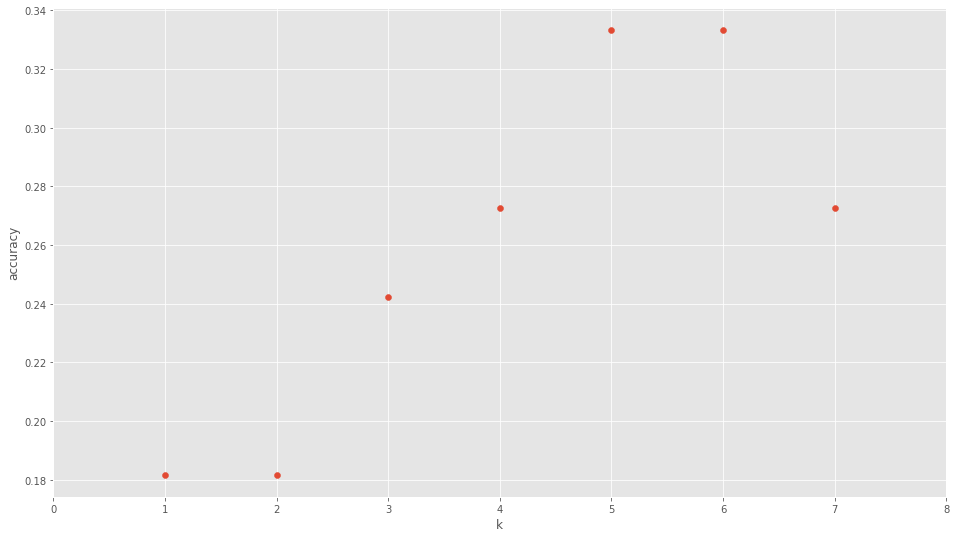

In [51]:
k_range_10_10inst_v2 = range(1, 8)
scores_10_10inst_v2 = []
for k in k_range_10_10inst_v2:
    knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors = k)
    knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
    scores_10_10inst_v2.append(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_10_10inst_v2, scores_10_10inst_v2)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.18


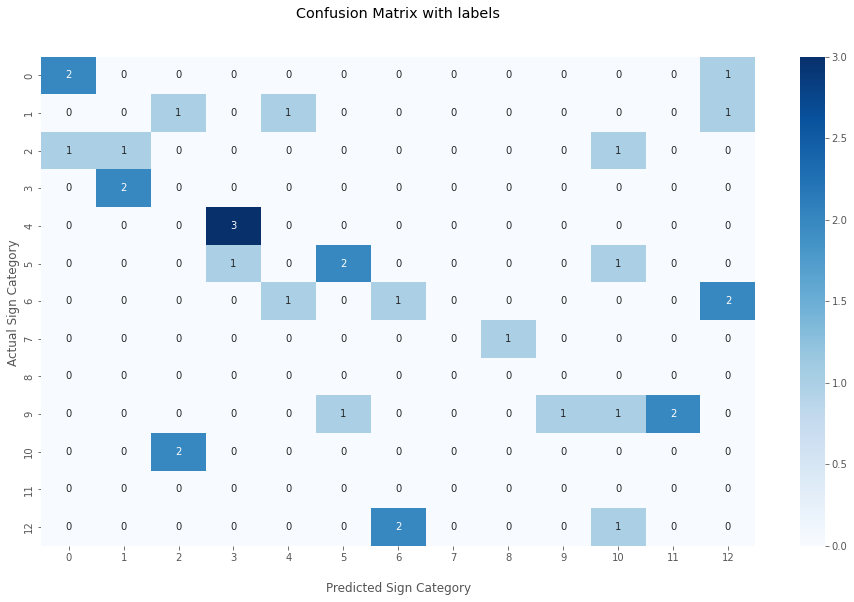

In [52]:
n_neighbors_10_10inst_v2 = 1
 
knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors_10_10inst_v2)
knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_train_10_10inst_v2, y_train_10_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2)))
	 
import pandas as pd

pred_10_10inst_v2 = knn_10_10inst_v2.predict(X_test_10_10inst_v2)
cf_matrix_10_10inst_v2 = confusion_matrix(y_test_10_10inst_v2, pred_10_10inst_v2)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_v2 = sns.heatmap(cf_matrix_10_10inst_v2, annot=True, cmap='Blues')

ax_10_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_v2.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.62
Accuracy of K-NN classifier on test set: 0.18


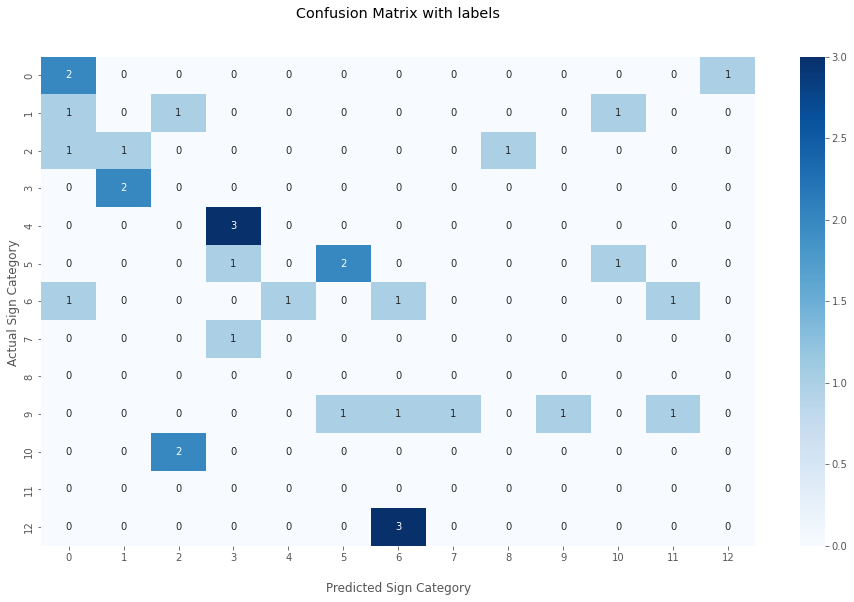

In [53]:
n_neighbors_10_10inst_v2 = 2
 
knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors_10_10inst_v2)
knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_train_10_10inst_v2, y_train_10_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2)))
	 
import pandas as pd

pred_10_10inst_v2 = knn_10_10inst_v2.predict(X_test_10_10inst_v2)
cf_matrix_10_10inst_v2 = confusion_matrix(y_test_10_10inst_v2, pred_10_10inst_v2)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_v2 = sns.heatmap(cf_matrix_10_10inst_v2, annot=True, cmap='Blues')

ax_10_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_v2.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.52
Accuracy of K-NN classifier on test set: 0.24


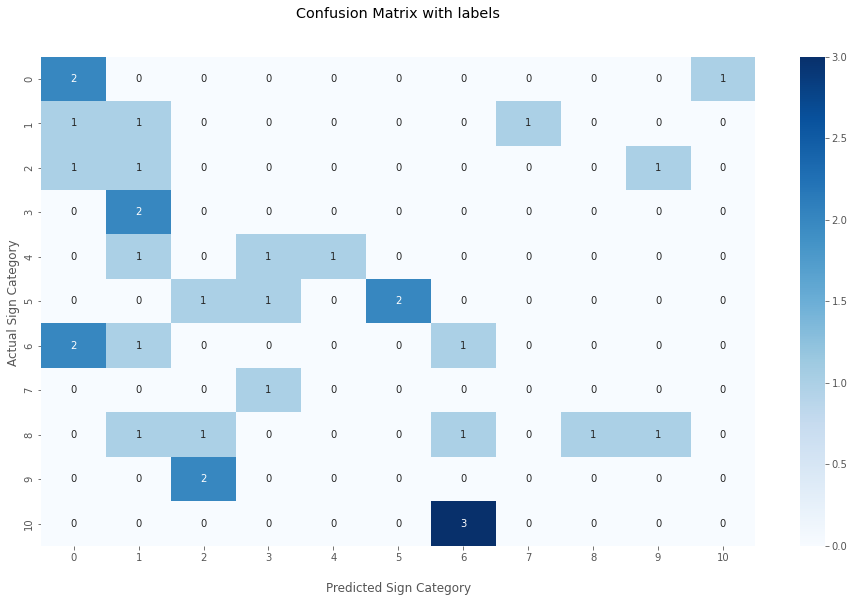

In [54]:
n_neighbors_10_10inst_v2 = 3
 
knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors_10_10inst_v2)
knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_train_10_10inst_v2, y_train_10_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2)))
	 
import pandas as pd

pred_10_10inst_v2 = knn_10_10inst_v2.predict(X_test_10_10inst_v2)
cf_matrix_10_10inst_v2 = confusion_matrix(y_test_10_10inst_v2, pred_10_10inst_v2)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_v2 = sns.heatmap(cf_matrix_10_10inst_v2, annot=True, cmap='Blues')

ax_10_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_v2.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.51
Accuracy of K-NN classifier on test set: 0.33


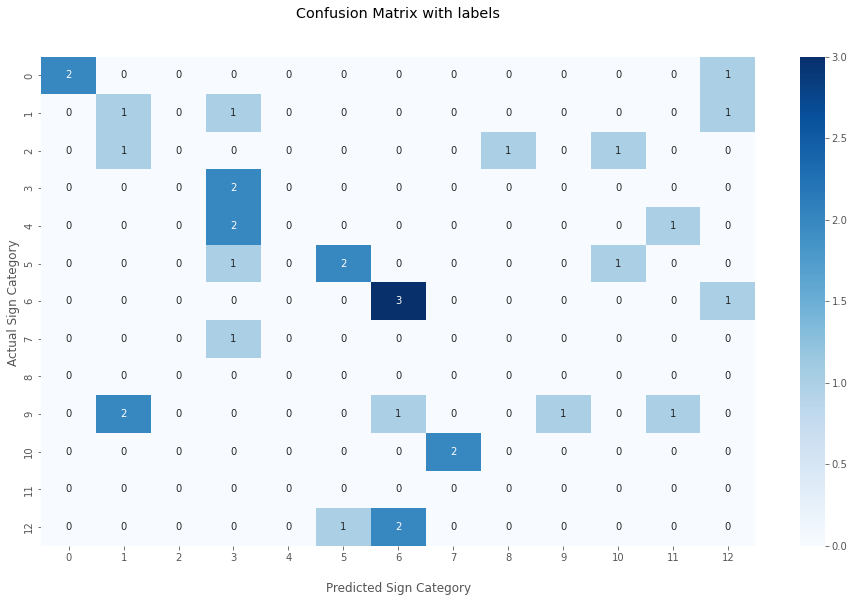

In [55]:
n_neighbors_10_10inst_v2 = 5
 
knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors_10_10inst_v2)
knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_train_10_10inst_v2, y_train_10_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2)))
	 
import pandas as pd

pred_10_10inst_v2 = knn_10_10inst_v2.predict(X_test_10_10inst_v2)
cf_matrix_10_10inst_v2 = confusion_matrix(y_test_10_10inst_v2, pred_10_10inst_v2)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_v2 = sns.heatmap(cf_matrix_10_10inst_v2, annot=True, cmap='Blues')

ax_10_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_v2.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()